
# Biodiversity in Four US National Parks
by Spencer Goodin

This project is an exploration of several biodiversity markers for various plant and animal species in four US national parks.

Throughout the project, we will explore, analyze, visualize, and make conclusions about the conservation efforts being made by the National Parks Service.

```Note: The datasets used for this project were provided by Codecademy.com. While they are inspired by real conservation data, they are mostly fictional, and have been provided for educational and demonstrative purposes only.```

## Introduction

The US National Parks Service is the organization responsible for maintaining and preserving many nature reserves and heritage sites in the US. They're not just nature's custodians though; the parks service is responsible for closely monitoring the health and wellbeing of all the wildlife in our national parks. This analysis will take a look at some data from four US national parks and assess a few key markers of biodiversity.

The goal of this analysis will be to determine the following:

- What are the most common animals at each national park?

- How are the various conservation efforts distributed among different wildlife classifications?

- Are there significant differences in conservation efforts for different classifications of animals?

- How do rates of concervation efforts compare between plants and animals?

## Setting Up

Start by importing the python libraries that will be used, adjusting some pandas output settings, and loading the datasets.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

pd.options.display.width = 0
pd.options.display.expand_frame_repr = False
pd.options.display.colheader_justify = 'left'

observations_raw = pd.read_csv('observations.csv')
species_raw = pd.read_csv('species_info.csv')

## Data

Next, begin cleaning up the data, and take a look at how it is structured.

The `observations.csv` file contains 22164 unique observations of three variables, which are:

- scientific name
- park name
- number of observations

And the `species_info.csv` file contains 5541 unique observations of four variables, which are:

- category
- scientific name
- common name
- conservation status

In addition, we can also go ahead and merge our two dataframes, observations and species, into one dataframe containing all six variables.

`About duplicate values: Several animal and park combinations in observations.csv have duplicate entries with different observation counts. No clarification on these duplicate values was available, however it is assumed that these duplicate entries were meant to be updated after subsequent observation; as such the lower observation count entries are removed for the purpose of analysis. Duplicates in species_info.csv are 1:1 duplicates, and can therefore be removed without cause for concern.`

In [2]:
observations = observations_raw.sort_values('observations').drop_duplicates(['scientific_name', 'park_name'])
species = species_raw.drop_duplicates(['scientific_name'])

print(f'observations: {observations.shape} {observations.columns}')
print(f'species: {species.shape} {species.columns}')

data = pd.merge(observations, species, on='scientific_name')

observations: (22164, 3) Index(['scientific_name', 'park_name', 'observations'], dtype='object')
species: (5541, 4) Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


Next, assign a label to the missing values in our conservation status variable. Each Species is given an conservation status, with species which are not the focus of a conservation effort being unlabeled. For clarity, we will replace these missing values with 'No Intervention'.

In [3]:
data.fillna('No Intervention', inplace = True)

Now that the missing values have been labeled, create two separate dataframes for plants and animals.

In [4]:
plants = data[(data.category == 'Vascular Plant') | (data.category == 'Nonvascular Plant')]
animals = data[(data.category != 'Vascular Plant') & (data.category != 'Nonvascular Plant')]

## Exploration

Now that the environment has been configured and the dataframes are set up, it's time to begin exploring the dataset. First, take a look at the number of plant and animal species, and the groups they're catgorized into.

Starting off, check the number of species of plants and animals, without breaking them down into further categorizations.

In [5]:
print(f'Species of plants: {plants.scientific_name.nunique()}')
print(f'Species of animals: {animals.scientific_name.nunique()}')

Species of plants: 4595
Species of animals: 946


Taking a closer look, vascular plants, or plants with veins, are by far the most common specimine found in the national parks, with 4262 different species of vascular plant. The most common type of animal are birds, at 488 different species; the least common are reptiles with 78 different species, narrowly beating out amphibians which have 79.

In [6]:
print(species.groupby(species.category).scientific_name.count())

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
Name: scientific_name, dtype: int64


Next, we'll take a look at the most common animal at each park. 
- Yellowstone National Park: Western Painted Turtle (307 sightings)
- Yosemite National Park: Red Knot (207 sightings)
- Bryce National Park: American Marten (167 sightings)
- Great Smoky Mountains National Park: Cackling Goose (139 sightings)

In [7]:
print(animals.sort_values(['observations'], ascending = False).groupby(['park_name']).head(1))

      scientific_name         park_name                             observations category common_names                        conservation_status
17403  Chrysemys picta bellii            Yellowstone National Park  307           Reptile              Western Painted Turtle  No Intervention   
21618        Calidris canutus               Yosemite National Park  207              Bird                            Red Knot  No Intervention   
2829            Bubulcus ibis                  Bryce National Park  164              Bird  Cattle Egret, Western Cattle Egret  No Intervention   
21849       Branta hutchinsii  Great Smoky Mountains National Park  139              Bird                      Cackling Goose  No Intervention   


Interestingly, there is a sizeable gap in number of observations among the most popular animal at each park. 

Taking a closer look, we can see that this trend is simply a reflection of overall animal populations for each area.

                                     observations
park_name                                        
Yellowstone National Park            228776      
Yosemite National Park               136376      
Bryce National Park                   91666      
Great Smoky Mountains National Park   67099      


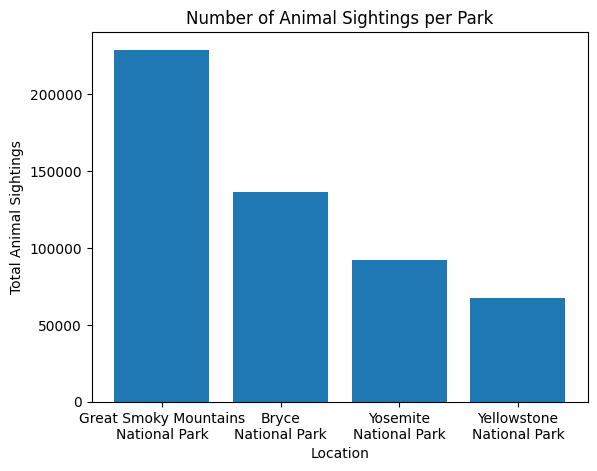

In [113]:
print(animals.groupby('park_name').sum('observations').sort_values(by='observations', ascending = False))

plt.bar(animals.park_name.unique(), animals.observations.groupby(animals.park_name).sum().sort_values(ascending=False))
plt.ticklabel_format(useOffset=False,style = 'plain', axis='y')
plt.xticks(animals.park_name.unique(), ['Great Smoky Mountains\nNational Park', 'Bryce\nNational Park', 'Yosemite\nNational Park', 'Yellowstone\nNational Park'])
plt.xlabel('Location')
plt.ylabel('Total Animal Sightings')
plt.title('Number of Animal Sightings per Park')
plt.show(); plt.close()

## Analysis

#### Rates of Conservation Efforts

To begin the analysis, take a look at the distribution of conservation efforts for the various species classifications.

category            Amphibian  Bird  Fish  Mammal  Nonvascular Plant  Reptile  Vascular Plant
Species of Concern  4.0        68.0  4.0   22.0    5.0                5.0      43.0          
Threatened          2.0         0.0  3.0    2.0    0.0                0.0       2.0          
Endangered          1.0         4.0  3.0    6.0    0.0                0.0       1.0          
In Recovery         0.0         3.0  0.0    0.0    0.0                0.0       0.0          


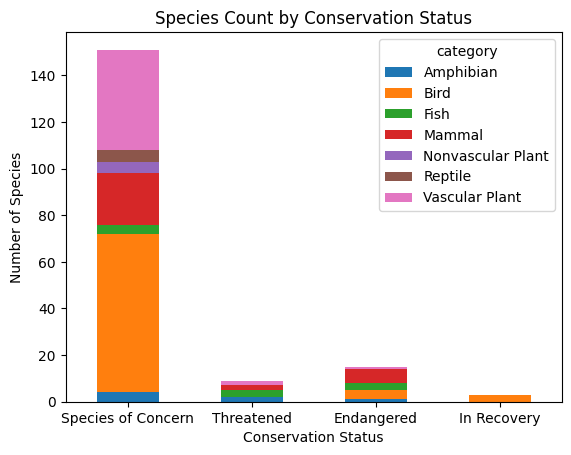

In [114]:
category_threat = data[data['conservation_status'] != 'No Intervention'].groupby(['category', 'conservation_status']).scientific_name.nunique().unstack(level = 0)
category_threat.index = ([2,3,0,1])
category_threat.sort_index(inplace=True)
category_threat.index = (['Species of Concern','Threatened','Endangered','In Recovery'])
category_threat.plot(kind = 'bar', stacked = True, title = 'Species Count by Conservation Status', xlabel = 'Conservation Status', ylabel = 'Number of Species')
plt.xticks(rotation=0)
category_threat.fillna(0, inplace=True)
print(category_threat)
plt.show(); plt.close()

You might remember that there were 488 species of birds accounted for in our dataset. Looking at this distribution of conservation efforts, we can see that there are 75 species of bird that are seeing some kind of conservation effort, more than 15% of our total bird species. Let's check if birds are the largest concentration of conservation efforts.

While birds do have the second highest rate of conservation efforts, at ~15.3%, the top spot is actually taken by mammals, which sit at ~17%. 

In [58]:
threat_percentages = data.groupby('category').nunique()
threat_percentages['species'] = data.groupby('category').scientific_name.nunique()
threat_percentages['threatened'] = data[data['conservation_status'] != 'No Intervention'].groupby('category').scientific_name.nunique()
threat_percentages['percentage'] = (data[data['conservation_status'] != 'No Intervention'].groupby('category').scientific_name.nunique()) / (data.groupby('category').scientific_name.nunique())
threat_percentages = threat_percentages[['species','threatened','percentage']]
print(threat_percentages)

                   species  threatened  percentage
category                                          
Amphibian            79      7          0.088608  
Bird                488     75          0.153689  
Fish                125     10          0.080000  
Mammal              176     30          0.170455  
Nonvascular Plant   333      5          0.015015  
Reptile              78      5          0.064103  
Vascular Plant     4262     46          0.010793  


#### Proportions of Conservation Efforts

While the percentage of each species group that needs conservation is certainly interesting, it's not the only metric that can be analyzed. Next we can find the proportion of conservation efforts each category accounts for.

The highest of these is, as one might expect, birds, accounting for 42% of all conservation efforts. 

category
Bird                 0.421348
Vascular Plant       0.258427
Mammal               0.168539
Fish                 0.056180
Amphibian            0.039326
Nonvascular Plant    0.028090
Reptile              0.028090
Name: proportion, dtype: float64


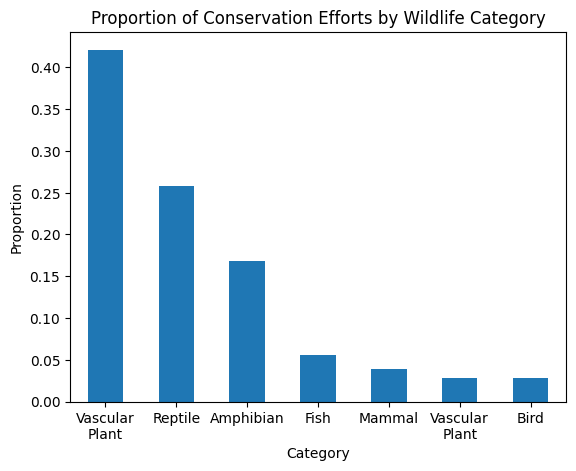

In [115]:
threat_percentages['proportion'] = (threat_percentages.threatened)/(threat_percentages.threatened.sum())
threat_percentages.sort_values('proportion', ascending = False, inplace = True)
threat_percentages.plot(kind = 'bar', y='proportion', legend = None, title = 'Proportion of Conservation Efforts by Wildlife Category', xlabel = 'Category', ylabel = 'Proportion')
plt.xticks(range(len(threat_percentages.index)), ['Vascular\nPlant','Reptile','Amphibian','Fish','Mammal','Vascular\nPlant','Bird'], rotation=0)
print(threat_percentages.proportion)
plt.show(); plt.close()

#### Conservation Efforts Between Plants and Animals

The proportions we just calculated another good point: there seems to be a large disparity between the conservation efforts needed for plants and animals. 

Calculating the ratio of conservation efforts for plants and animals shows that there are 2.5x more conservation efforts for animals than plants. Additionally, while only 1% of plant species are the focus of conservation efforts, conservation efforts are being made for 13% of animal species.


In [12]:
ancount =  animals.groupby('category').scientific_name.nunique().sum()
anthreat = animals[animals['conservation_status'] != 'No Intervention'].groupby('category').scientific_name.nunique().sum()
plcount = plants.groupby('category').scientific_name.nunique().sum()
plthreat = plants[plants['conservation_status'] != 'No Intervention'].groupby('category').scientific_name.nunique().sum()

print(anthreat/plthreat)
print(anthreat/ancount)
print(plthreat/plcount)

2.4901960784313726
0.13424947145877378
0.011099020674646356


That's quite a difference. Let's check to make sure it is statistically significant.

After checking the Chi Squared statistic (329.77) and p-value (<0.000), large, statistically significant difference between the rates of conservation efforts for plants and animals.

In [13]:
threat_ratios = np.array([[anthreat, plthreat],[ancount, plcount]])
result = chi2_contingency(threat_ratios)
print(f'Chi Squared Statistic (correlation): {result.statistic}\nP-value (significance): {result.pvalue}')

Chi Squared Statistic (correlation): 329.7662280127497
P-value (significance): 1.0806952989706841e-73


## Conclusions

This analysis began with the goal to answer four questions. Having finished our analysis, the results are as follows:

- What are the most common animals at each national park?

The most prevalent animal at each park were the western painted turtle, red knot, american marten and cackling goose. The population size of these animals displayed a trend in overall animal populations at each of their respective parks.

- Are there significant differences in conservation efforts for different classifications of animals?

Conservation efforts for various animal classifications range from ~6.5% to ~17%.

- How are the various conservation efforts distributed among different wildlife classifications?

Birds are the most group of species to be the subject of conservation, with ~42% of conservation efforts being for birds. They are followed by vascular plants at ~25% and mammals at ~17%.

- How do rates of concervation efforts compare between plants and animals?

Conservation efforts are focused primarily on animals, with 2.5x the number of animal species receiving conservation efforts compared to plants. Additionally, 1% of all plant species recieve conservation efforts, whereas the same is true for 13% of animals. 


## Future Research

Being that this is cross-sectional data, it is not possible to determine any sort of change over time regarding what types of species need concentration efforts. The incorporation of time-series data would allow for the assessment of effectiveness of ongoing conservation efforts. Additionally, this dataset is only for four national parks, of which there are several hundred; incorporating data from a larger selection of parks may reveal different trends in biodiversity. 